In [1]:
pip install numpy pandas matplotlib statsmodels scikit-learn

In [2]:
import pandas as pd

# Load your data
data = pd.read_csv('/content/LTC.csv')

# Display the first few rows
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/5/2021,144.849335,144.849335,134.960266,138.073242,138.073242,1338245545
1,7/6/2021,137.951675,142.703567,135.924835,138.985642,138.985642,1504907480
2,7/7/2021,138.960159,142.900574,137.183868,137.371216,137.371216,1594183502
3,7/8/2021,137.518265,137.672226,128.446640,132.308502,132.308502,1654154836
4,7/9/2021,132.170120,135.733536,126.361649,134.571594,134.571594,1578256301


In [3]:
# Check for missing values
print(data.isnull().sum())

# Get summary statistics
print(data.describe())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
             Open        High         Low       Close   Adj Close  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   105.408640  108.668183  102.058898  105.331786  105.331786   
std     47.258995   49.461319   45.164786   47.194618   47.194618   
min     43.314003   46.132015   40.680405   43.300301   43.300301   
25%     66.197287   68.838120   63.797278   66.195454   66.195454   
50%     92.299946   94.466545   90.385937   92.348713   92.348713   
75%    133.842564  136.675049  128.718243  133.230724  133.230724   
max    279.240936  294.562866  259.988373  278.007507  278.007507   

             Volume  
count  7.300000e+02  
mean   1.068949e+09  
std    9.459942e+08  
min    1.783969e+08  
25%    4.972678e+08  
50%    7.068865e+08  
75%    1.298998e+09  
max    8.716460e+09  


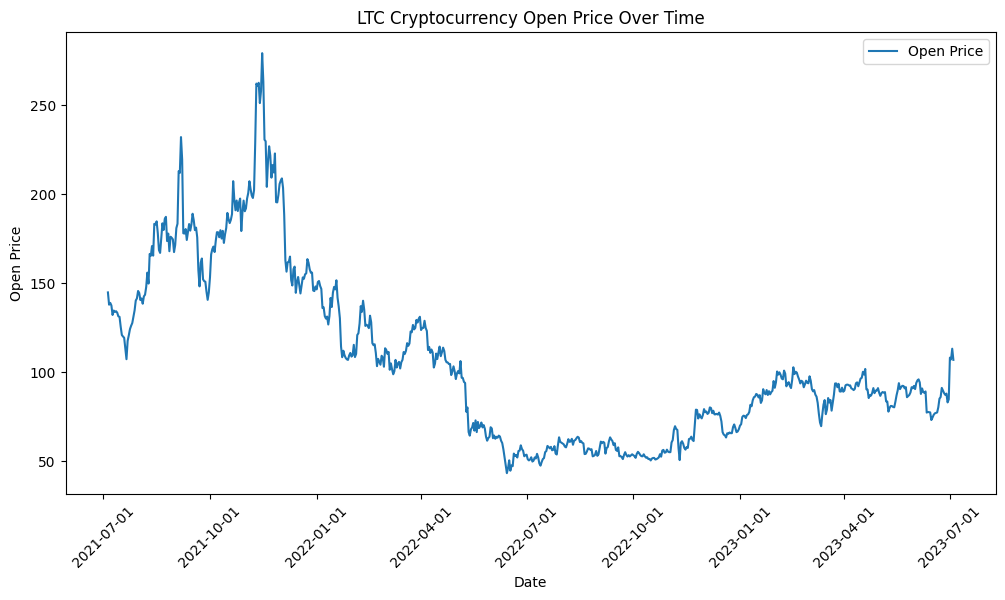

In [13]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Assuming 'Date' is a datetime object, if not, convert it using pd.to_datetime
data['Date'] = pd.to_datetime(data['Date'])

# Plot the Open price over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Open'], label='Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('LTC Cryptocurrency Open Price Over Time')
plt.legend()

# Customize the date format
date_format = DateFormatter("%Y-%m-%d")  # You can adjust the format as needed
plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45)  # Rotate the date labels for better readability

plt.show()

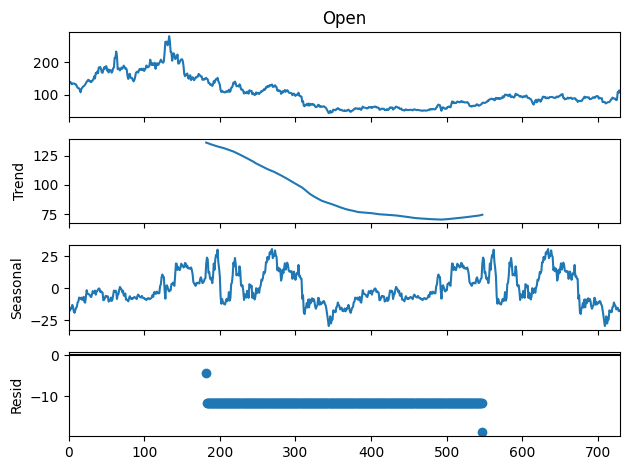

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Open'], model='additive', period=365)
result.plot()
plt.show()

In [38]:
num_steps = 15  # Replace with the desired number of steps into the future

from statsmodels.tsa.arima.model import ARIMA

# Define p, d, and q
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1  # Moving average order

# Fit an ARIMA model
model = ARIMA(data['Open'], order=(p, d, q))
model_fit = model.fit()

# Forecast future LTC prices
forecast = model_fit.forecast(steps=num_steps)
print(forecast)

730    106.661314
731    106.658655
732    106.555216
733    106.553949
734    106.454583
735    106.449560
736    106.353811
737    106.345309
738    106.252905
739    106.241186
740    106.151876
741    106.137182
742    106.050733
743    106.033288
744    105.949485
Name: predicted_mean, dtype: float64
